In [12]:
import numpy as np
import discH
import discH.dynamic_component as dc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

HALO MODELS

Model: Isothermal halo
d0: 5.00e+05 Msun/kpc3 
rc: 10.00
e: 0.000 
mcut: 100.000 



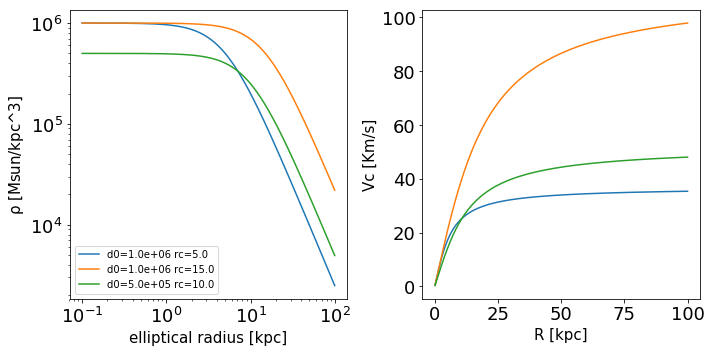

In [13]:
#Isothermal halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)



#d=d0*(1+m*m/rc*rc)^(-1)
mcut=100 #radius where d(m>mcut)=0
e=0 #ellipticity

d0=1e6 #Cental density in Msun/kpc3
rc=5 #Core radius in Kpc
iso_halo=dc.isothermal_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=iso_halo.dens(R) #3D dens
vcirc=iso_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='d0=%.1e rc=%.1f'%(d0,rc))
axv.plot(R,vcirc[:,1],label='d0=%.1e rc=%.1f'%(d0,rc))


d0=1e6 #Cental density in Msun/kpc3
rc=15 #Core radius in Kpc
iso_halo=dc.isothermal_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=iso_halo.dens(R) #3D dens
vcirc=iso_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='d0=%.1e rc=%.1f'%(d0,rc))
axv.plot(R,vcirc[:,1],label='d0=%.1e rc=%.1f'%(d0,rc))

d0=5e5 #Cental density in Msun/kpc3
rc=10 #Core radius in Kpc
iso_halo=dc.isothermal_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=iso_halo.dens(R) #3D dens
vcirc=iso_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='d0=%.1e rc=%.1f'%(d0,rc))
axv.plot(R,vcirc[:,1],label='d0=%.1e rc=%.1f'%(d0,rc))

print(iso_halo)

axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()



Model: NFW halo
d0: 3.26e+06 Msun/kpc3 
rs: 27.99
e: 0.000 
mcut: 100.000 



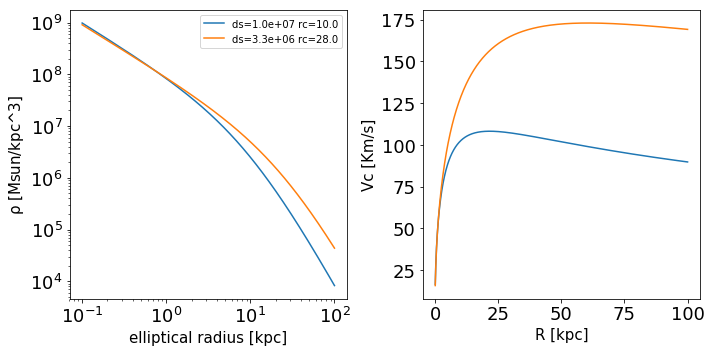

In [14]:
#NFW halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)
R=np.linspace(0,100,1000) 
#d=d0*( (m/rs)^(-1) ) * ( (1+m/rs)^(-2) )  
mcut=100 #radius where d(m>mcut)=0
e=0 #ellipticity

#Primary use: NFW_halo(d0, rs, mcut=100, e=0)
# d=d0/((r/rs)*(1+r/rs)^2)
#-d0 Scale density in Msun/kpc3
#-rs Scale length



#Secondary use: NFW_halo.cosmo(c, V200, H=67  , mcut=100, e=0)
#-c Concentration parameter
#-V200 Velocity (km/s) at virial Radius R200  (radius where the density is 200 times the critical density of the Universe)
#-H Hubble constant (km/s/Mpc)

d0=1e7 #Scale density in Msun/kpc3
rs=10 #Scale radius in Kpc
nfw_halo=dc.NFW_halo(d0=d0, rs=rs, mcut=mcut, e=e) #primary method to call NFW halo
dens=nfw_halo.dens(R) #3D dens
vcirc=nfw_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(nfw_halo.d0,nfw_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(nfw_halo.d0,nfw_halo.rs))


c=8 #Scale density in Msun/kpc3
V200=150 #Scale radius in Kpc
nfw_halo=dc.NFW_halo.cosmo(c=c, V200=V200, mcut=mcut, e=e) #secondary metho do call NFW using coslomogical params:
#NWF_halo.cosmo(c, V200, H=67, e=0, mcut=100) H is the Hubble constant in km/s/Mpc (67 default)
dens=nfw_halo.dens(R) #3D dens
vcirc=nfw_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(nfw_halo.d0,nfw_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(nfw_halo.d0,nfw_halo.rs))

print(nfw_halo)

axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()




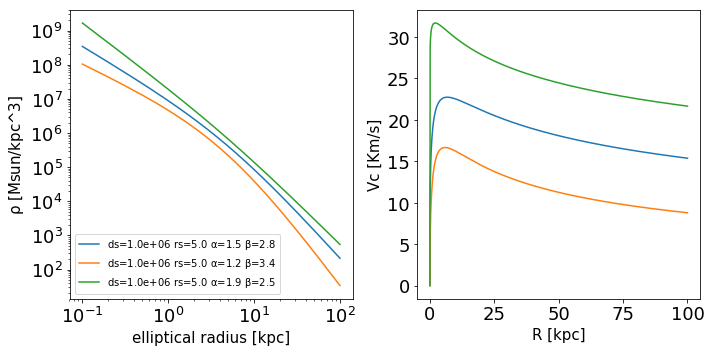

In [15]:
#alfabeta halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)
R=np.linspace(0,100,1000) 
#d=d0*( (m/rs)^(-alfa) ) * ( (1+m/rs)^(-(beta-alfa)) )  
mcut=100 #radius where d(m>mcut)=0
e=0 #ellipticity

d0=1e6 #Scale density in Msun/kpc3
rs=5 #Scale radius in Kpc
alfa=1.5 #Inner slope
beta=2.8 #Outer slope
ab_halo=dc.alfabeta_halo(d0=d0,alpha=alfa, beta=beta, rs=rs, mcut=mcut, e=e)
dens=ab_halo.dens(R) #3D dens
vcirc=ab_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rs=%.1f $\\alpha$=%.1f $\\beta$=%.1f'%(ab_halo.d0,ab_halo.rs, ab_halo.alfa, ab_halo.beta))
axv.plot(R,vcirc[:,1],label='ds=%.1e rs=%.1f $\\alpha$=%.1f $\\beta$=%.1f'%(ab_halo.d0,ab_halo.rs, ab_halo.alfa, ab_halo.beta))

d0=1e6 #Scale density in Msun/kpc3
rs=5 #Scale radius in Kpc
alfa=1.2 #Inner slope
beta=3.4 #Outer slope
ab_halo=dc.alfabeta_halo(d0=d0,alpha=alfa, beta=beta, rs=rs, mcut=mcut, e=e)
dens=ab_halo.dens(R) #3D dens
vcirc=ab_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rs=%.1f $\\alpha$=%.1f $\\beta$=%.1f'%(ab_halo.d0,ab_halo.rs, ab_halo.alfa, ab_halo.beta))
axv.plot(R,vcirc[:,1],label='ds=%.1e rs=%.1f $\\alpha$=%.1f $\\beta$=%.1f'%(ab_halo.d0,ab_halo.rs, ab_halo.alfa, ab_halo.beta))

d0=1e6 #Scale density in Msun/kpc3
rs=5 #Scale radius in Kpc
alfa=1.9 #Inner slope
beta=2.5 #Outer slope
ab_halo=dc.alfabeta_halo(d0=d0,alpha=alfa, beta=beta, rs=rs, mcut=mcut, e=e)
dens=ab_halo.dens(R) #3D dens
vcirc=ab_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rs=%.1f $\\alpha$=%.1f $\\beta$=%.1f'%(ab_halo.d0,ab_halo.rs, ab_halo.alfa, ab_halo.beta))
axv.plot(R,vcirc[:,1],label='ds=%.1e rs=%.1f $\\alpha$=%.1f $\\beta$=%.1f'%(ab_halo.d0,ab_halo.rs, ab_halo.alfa, ab_halo.beta))

axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()





Model: Hernquist halo
d0: 2.00e+06 Msun/kpc3 
rs: 10.00
e: 0.000 
mcut: 100.000 



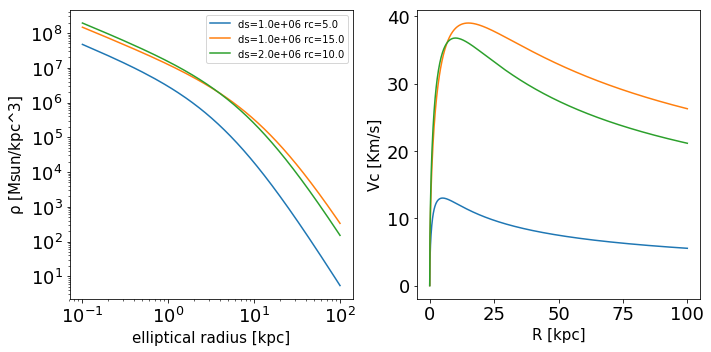

In [16]:
#hernquist halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)
R=np.linspace(0,100,1000) 
#d=d0*( (m/rs)^(-1) ) * ( (1+m/rs)^(-2 )  
mcut=100 #radius where d(m>mcut)=0
e=0 #ellipticity


d0=1e6 #Scale density in Msun/kpc3
rs=5 #Scale radius in Kpc
he_halo=dc.hernquist_halo(d0=d0, rs=rs, mcut=mcut, e=e)
dens=he_halo.dens(R) #3D dens
vcirc=he_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(he_halo.d0,he_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(he_halo.d0,he_halo.rs))

d0=1e6 #Scale density in Msun/kpc3
rs=15 #Scale radius in Kpc
he_halo=dc.hernquist_halo(d0=d0, rs=rs, mcut=mcut, e=e)
dens=he_halo.dens(R) #3D dens
vcirc=he_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(he_halo.d0,he_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(he_halo.d0,he_halo.rs))

d0=2e6 #Scale density in Msun/kpc3
rs=10 #Scale radius in Kpc
he_halo=dc.hernquist_halo(d0=d0, rs=rs, mcut=mcut, e=e)
dens=he_halo.dens(R) #3D dens
vcirc=he_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(he_halo.d0,he_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(he_halo.d0,he_halo.rs))

print(he_halo)


axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()

Model: deVacouler like halo
d0: 2.00e+06 Msun/kpc3 
rs: 10.00
e: 0.000 
mcut: 100.000 



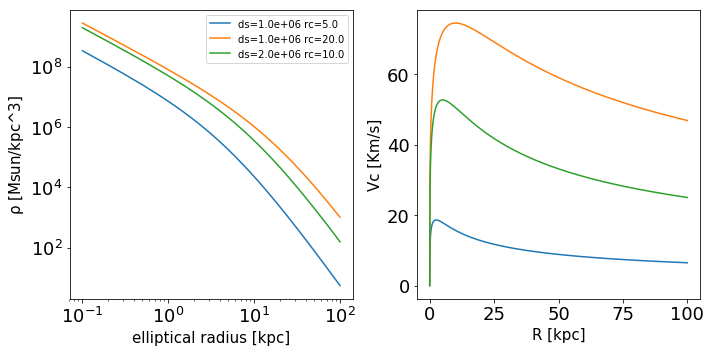

In [17]:
#deVacouler like halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)
R=np.linspace(0,100,1000) 
#d=d0*( (m/rs)^(-3/2) ) * ( (1+m/rs)^(-5/2) )  
#It is an approximation of the R1/4 law
mcut=100 #radius where d(m>mcut)=0
e=0 #ellipticity


d0=1e6 #Scale density in Msun/kpc3
rs=5 #Scale radius in Kpc
dv_halo=dc.deVacouler_like_halo(d0=d0, rs=rs, mcut=mcut, e=e)
dens=dv_halo.dens(R) #3D dens
vcirc=dv_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(dv_halo.d0,dv_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(dv_halo.d0,dv_halo.rs))

d0=1e6 #Scale density in Msun/kpc3
rs=20 #Scale radius in Kpc
dv_halo=dc.deVacouler_like_halo(d0=d0, rs=rs, mcut=mcut, e=e)
dens=dv_halo.dens(R) #3D dens
vcirc=dv_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(dv_halo.d0,dv_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(dv_halo.d0,dv_halo.rs))

d0=2e6 #Scale density in Msun/kpc3
rs=10 #Scale radius in Kpc
dv_halo=dc.deVacouler_like_halo(d0=d0, rs=rs, mcut=mcut, e=e)
dens=dv_halo.dens(R) #3D dens
vcirc=dv_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='ds=%.1e rc=%.1f'%(dv_halo.d0,dv_halo.rs))
axv.plot(R,vcirc[:,1],label='ds=%.1e rc=%.1f'%(dv_halo.d0,dv_halo.rs))

print(dv_halo)

axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()

Model: Plummer halo
Mass: 4.71e+09 Msun 
d0: 2.00e+06 Msun/kpc3 
rc: 10.00
e: 0.000 
mcut: 100.000 



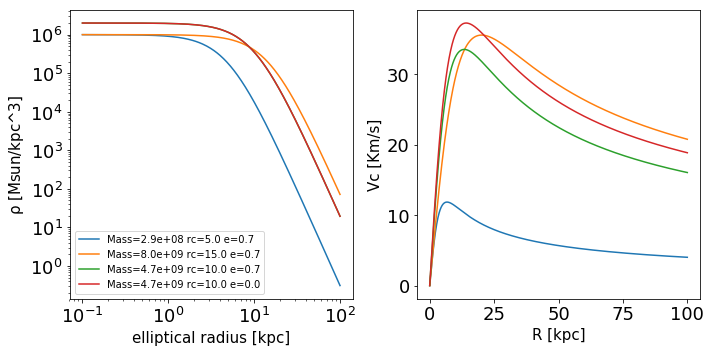

In [18]:
#Plummer halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)
R=np.linspace(0,100,1000) 
#d=d0*( (1+m*m/rs*rs)^(-5/2) )  
mcut=100 #radius where d(m>mcut)=0
e=0.7 #ellipticity

d0=1e6 #Central density in Msun/kpc3
rc=5 #Core radius in Kpc
pl_halo=dc.plummer_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=pl_halo.dens(R) #3D dens
vcirc=pl_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='Mass=%.1e rc=%.1f e=%.1f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))
axv.plot(R,vcirc[:,1],label='Mass=%.1e rc=%.1f e=%1.f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))

d0=1e6 #Central density in Msun/kpc3
rc=15 #Core radius in Kpc
pl_halo=dc.plummer_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=pl_halo.dens(R) #3D dens
vcirc=pl_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='Mass=%.1e rc=%.1f e=%.1f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))
axv.plot(R,vcirc[:,1],label='Mass=%.1e rc=%.1f e=%1.f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))

d0=2e6 #Central density in Msun/kpc3
rc=10 #Core radius in Kpc
pl_halo=dc.plummer_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=pl_halo.dens(R) #3D dens
vcirc=pl_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='Mass=%.1e rc=%.1f e=%.1f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))
axv.plot(R,vcirc[:,1],label='Mass=%.1e rc=%.1f e=%1.f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))

d0=2e6 #Central density in Msun/kpc3
rc=10 #Core radius in Kpc
e=0
pl_halo=dc.plummer_halo(d0=d0, rc=rc, mcut=mcut, e=e)
dens=pl_halo.dens(R) #3D dens
vcirc=pl_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='Mass=%.1e rc=%.1f e=%.1f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))
axv.plot(R,vcirc[:,1],label='Mass=%.1e rc=%.1f e=%1.f'%(pl_halo.mass,pl_halo.rc, pl_halo.e))


print(pl_halo)

axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()

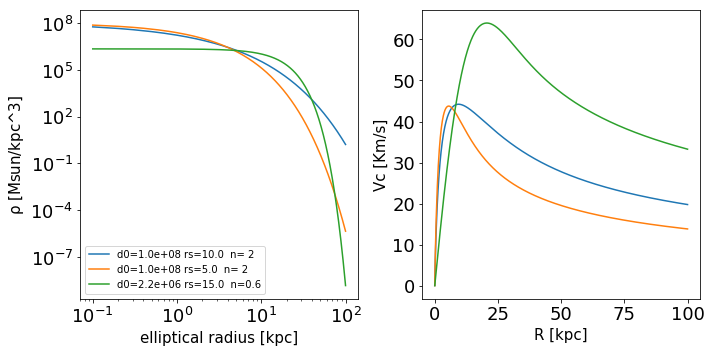

In [19]:
#Einasto halo
R=np.linspace(0,100,1000) 
fig=plt.figure(figsize=(10,5))
axd=fig.add_subplot(121)
axv=fig.add_subplot(122)
R=np.linspace(0,100,1000) 
mcut=100 #radius where d(m>mcut)=0
e=0.0 #ellipticity


#Primary use: einasto_halo(d0, n, rs, mcut=100, e=0)
# d=d0*exp(-dn*(r/rs)^(1/n))
#-d0 Central density in Msun/kpc3
#-n factor n
#-rs radius containing half the total mass of the halo



#Secondary use: einasto_halo.de(de, n, rs, mcut=100, e=0)
# d=de*exp(-2*n*((r/rs)^(1/n) - 1))
#-de Density at rs
#-n factor n
#-rs radius containing half the total mass of the halo



d0=1e8 #Central density in Msun/kpc3
n=2 #Factor n
rs=10 #Radius containing half the total mass of the halo
ei_halo=dc.einasto_halo(d0=d0, n=n, rs=rs, mcut=mcut, e=e)
dens=ei_halo.dens(R) #3D dens
vcirc=ei_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='d0=%.1e rs=%.1f  n=%2.f'%(ei_halo.d0, ei_halo.rs, ei_halo.n))
axv.plot(R,vcirc[:,1],label='d0=%.1e rs=%.1f  n=%2.f'%(ei_halo.d0, ei_halo.rs, ei_halo.n))

d0=1e8 #Central density in Msun/kpc3
n=1.5 #Core radius in Kpc
rs=5
ei_halo=dc.einasto_halo(d0=d0, n=n, rs=rs, mcut=mcut, e=e)
dens=ei_halo.dens(R) #3D dens
vcirc=ei_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='d0=%.1e rs=%.1f  n=%2.f'%(ei_halo.d0, ei_halo.rs, ei_halo.n))
axv.plot(R,vcirc[:,1],label='d0=%.1e rs=%.1f  n=%2.f'%(ei_halo.d0, ei_halo.rs, ei_halo.n))


de=5e5 #Central density in Msun/kpc3
n=0.6 #Core radius in Kpc
rs=15
ei_halo=dc.einasto_halo.de(de=de, n=n, rs=rs, mcut=mcut, e=e)
dens=ei_halo.dens(R) #3D dens
vcirc=ei_halo.vcirc(R, nproc=2)
axd.plot(R,dens[:,1],label='d0=%.1e rs=%.1f  n=%.1f'%(ei_halo.d0, ei_halo.rs, ei_halo.n))
axv.plot(R,vcirc[:,1],label='d0=%.1e rs=%.1f  n=%.1f'%(ei_halo.d0, ei_halo.rs, ei_halo.n))

axd.set_xlabel('elliptical radius [kpc]', fontsize=15)
axd.set_ylabel('$\\rho$ [Msun/kpc^3]', fontsize=15)
axv.set_xlabel('R [kpc]', fontsize=15)
axv.set_ylabel('Vc [Km/s]', fontsize=15)
axd.set_xscale('log')
axd.set_yscale('log')
axd.legend()
plt.show()

DISC MODELS

Model: Exponential disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: gau
Radial density law: epoly 
Rd: 2.000 kpc 
Flaring law: tanh 
Fparam: 4.0e-01 1.5e+01 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 20.000 kpc 
Rlimit: None 



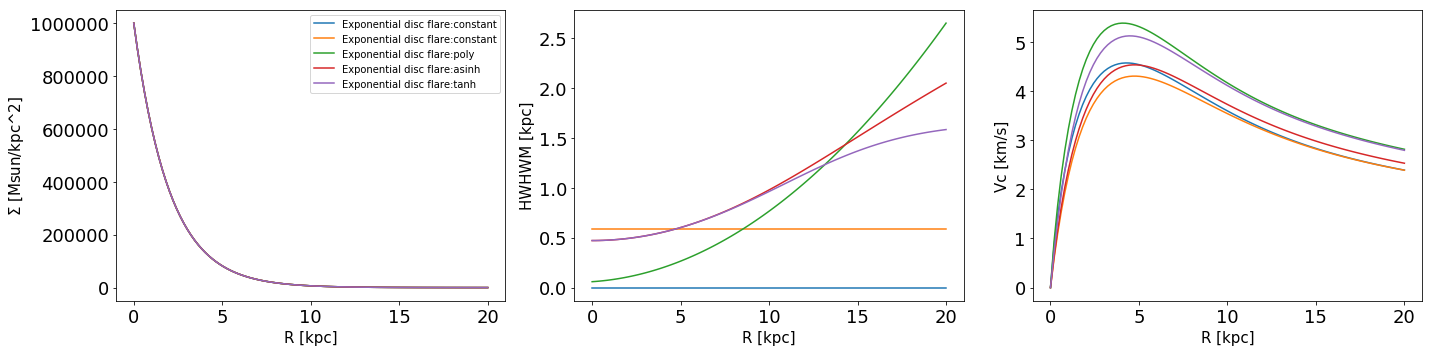

In [20]:
#Exponential disc
#Sigma(R)=Sigma0*Exp(-R/Rd)
sigma0=1e6 #Cental surface density in Msun/kpc2
Rd= 2 #Exponential scale length in kpc
Rcut= 50 #Cylindrical radius where dens(R>Rcut,z)=0
zcut= 20 #Cylindrical heigth where dens(R,|z|>zcut)=0
zlaw='gau' #Vertical density law: it could be gau, sech2, exp

fig=plt.figure(figsize=(20,5))
ax_dens=fig.add_subplot(131)
ax_flare=fig.add_subplot(132)
ax_vcirc=fig.add_subplot(133)
R=np.linspace(0,20,100) #Cylidrincal radii where estimate surface density and flare

#Vertical:
#razor-thin disc
ed=dc.Exponential_disc.thin(sigma0=sigma0, Rd=Rd, Rcut=Rcut, zcut=zcut)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#constant scale-heigth
zd=0.5 #Vertical scale heigth in kpc
ed=dc.Exponential_disc.thick(sigma0=sigma0, Rd=Rd, Rcut=Rcut, zcut=zcut,zd=zd, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#polynomial flare
pcoeff=[0.05,0.01,0.005] #Coefficent of the polynomial zd(R)=pcoeff[0]+pcoeff[1]*R+pcoeff[2]*R*R+....
ed=dc.Exponential_disc.polyflare(sigma0=sigma0, Rd=Rd, Rcut=Rcut, zcut=zcut, polycoeff=pcoeff, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#Asinh flare
#zd(R)=h0+c*(Arcsinh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
ed=dc.Exponential_disc.asinhflare(sigma0=sigma0, Rd=Rd, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#Tanh flare
#zd(R)=h0+c*(tanh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
ed=dc.Exponential_disc.tanhflare(sigma0=sigma0, Rd=Rd, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])
print(ed)

ax_dens.legend()
ax_dens.set_xlabel('R [kpc]',fontsize=15)
ax_vcirc.set_xlabel('R [kpc]',fontsize=15)
ax_flare.set_xlabel('R [kpc]',fontsize=15)
ax_dens.set_ylabel('$\Sigma$ [Msun/kpc^2]',fontsize=15)
ax_flare.set_ylabel('HWHWM [kpc]',fontsize=15)
ax_vcirc.set_ylabel('Vc [km/s]',fontsize=15)
plt.show()

Model: PolyExponential disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: gau
Radial density law: epoly 
Rd: 2.000 kpc 
Polycoeff: 1.0e+00 2.0e-01 4.0e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Flaring law: tanh 
Fparam: 4.0e-01 1.5e+01 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 20.000 kpc 
Rlimit: None 



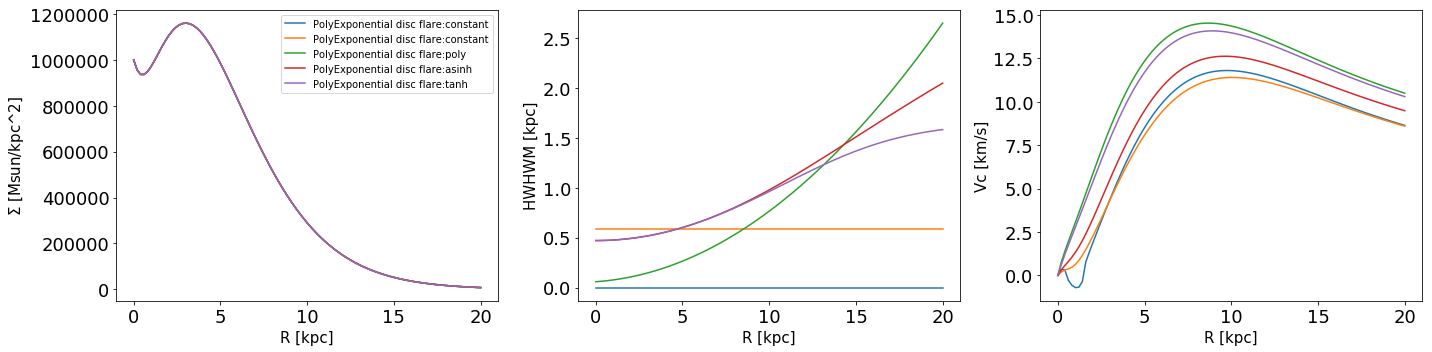

In [21]:
fig=plt.figure(figsize=(20,5))
ax_dens=fig.add_subplot(131)
ax_flare=fig.add_subplot(132)
ax_vcirc=fig.add_subplot(133)
R=np.linspace(0,20,100) #Cylidrincal radii where estimate surface density and flare



#Poly Exponential disc
#Sigma(R)=Sigma0*Exp(-R/Rd)*polynomial(R)
sigma0=1e6 #Cental surface density in Msun/kpc2
Rd= 2 #Exponential scale length in kpc
Rcoeff=[1,0.2,0.4] #Coefficent of the polynomial(R)=Rcoeff[0]+Rcoeff[1]*R+Rcoeff[2]*R*R+....
                     #Rcoeff will be always renormalised to have Rcoeff[0]=1
Rcut= 50 #Cylindrical radius where dens(R>Rcut,z)=0
zcut= 20 #Cylindrical heigth where dens(R,|z|>zcut)=0
zlaw='gau' #Vertical density law: it could be gau, sech2, exp
#Vertical:
#razor-thin disc
epd=dc.PolyExponential_disc.thin(sigma0=sigma0, Rd=Rd, coeff=Rcoeff, Rcut=Rcut, zcut=zcut)
sdens=epd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=epd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=epd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=epd.name + ' flare:'+epd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#constant scale-heigth
zd=0.5 #Vertical scale heigth in kpc
epd=dc.PolyExponential_disc.thick(sigma0=sigma0, Rd=Rd, coeff=Rcoeff, Rcut=Rcut, zcut=zcut, zd=zd, zlaw=zlaw)
sdens=epd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=epd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=epd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=epd.name + ' flare:'+epd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#polynomial flare
pcoeff=[0.05,0.01,0.005] #Coefficent of the polynomial zd(R)=pcoeff[0]+pcoeff[1]*R+pcoeff[2]*R*R+....
epd=dc.PolyExponential_disc.polyflare(sigma0=sigma0, Rd=Rd, coeff=Rcoeff, Rcut=Rcut, zcut=zcut, polycoeff=pcoeff, zlaw=zlaw)
sdens=epd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=epd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=epd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=epd.name + ' flare:'+epd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#Asinh flare
#zd(R)=h0+c*(Arcsinh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
epd=dc.PolyExponential_disc.asinhflare(sigma0=sigma0, Rd=Rd, coeff=Rcoeff, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=epd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=epd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=epd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=epd.name + ' flare:'+epd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#Tanh flare
#zd(R)=h0+c*(tanh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
epd=dc.PolyExponential_disc.tanhflare(sigma0=sigma0, Rd=Rd, coeff=Rcoeff, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=epd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=epd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=epd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=epd.name + ' flare:'+epd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])
print(epd)



ax_dens.legend()
ax_dens.set_xlabel('R [kpc]',fontsize=15)
ax_vcirc.set_xlabel('R [kpc]',fontsize=15)
ax_flare.set_xlabel('R [kpc]',fontsize=15)
ax_dens.set_ylabel('$\Sigma$ [Msun/kpc^2]',fontsize=15)
ax_flare.set_ylabel('HWHWM [kpc]',fontsize=15)
ax_vcirc.set_ylabel('Vc [km/s]',fontsize=15)
plt.show()

Model: Frat disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: gau
Radial density law: fratlaw 
Rd: 3.00 kpc
Rd2: 1.50 kpc
alpha: 1.50 
Flaring law: tanh 
Fparam: 4.0e-01 1.5e+01 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 20.000 kpc 
Rlimit: None 



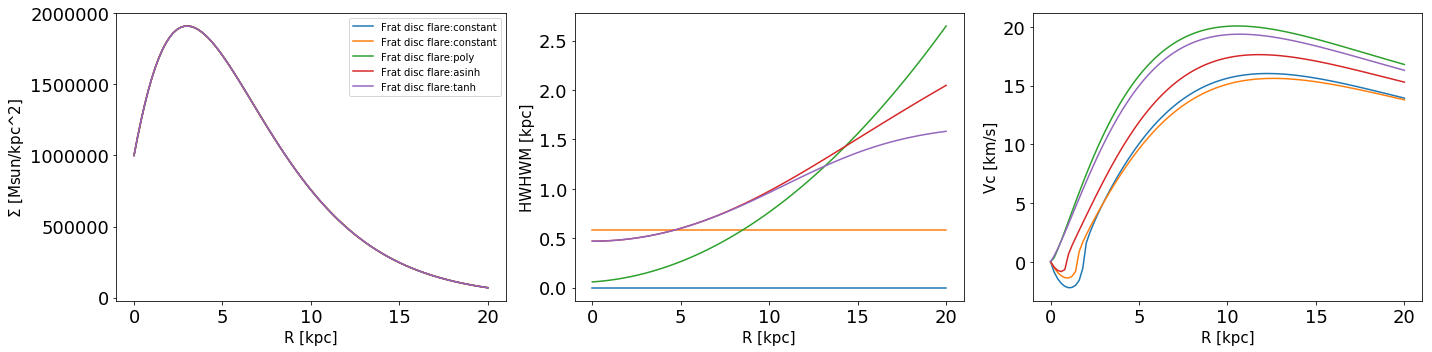

In [22]:
fig=plt.figure(figsize=(20,5))
ax_dens=fig.add_subplot(131)
ax_flare=fig.add_subplot(132)
ax_vcirc=fig.add_subplot(133)
R=np.linspace(0,20,100) #Cylidrincal radii where estimate surface density and flare

#Frat disc
#Sigma(R)=Sigma0*Exp(-R/Rd)*(1+R/Rd2)^alfa
sigma0=1e6 #Cental surface density in Msun/kpc2
Rd= 3 #Exponential scale length in kpc
Rd2= 1.5 #Secondary scale length in kpc
alfa= 1.5 #Exponent 
Rcut= 50 #Cylindrical radius where dens(R>Rcut,z)=0
zcut= 20 #Cylindrical heigth where dens(R,|z|>zcut)=0
zlaw='gau' #Vertical density law: it could be gau, sech2, exp
#Vertical:
#razor-thin disc
ed=dc.Frat_disc.thin(sigma0=sigma0, Rd=Rd, Rd2=Rd2,alpha=alfa, Rcut=Rcut, zcut=zcut)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#constant scale-heigth
zd=0.5 #Vertical scale heigth in kpc
ed=dc.Frat_disc.thick(sigma0=sigma0, Rd=Rd,Rd2=Rd2,alpha=alfa, Rcut=Rcut, zcut=zcut,zd=zd, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#polynomial flare
pcoeff=[0.05,0.01,0.005] #Coefficent of the polynomial zd(R)=pcoeff[0]+pcoeff[1]*R+pcoeff[2]*R*R+....
ed=dc.Frat_disc.polyflare(sigma0=sigma0, Rd=Rd,Rd2=Rd2,alpha=alfa,  Rcut=Rcut, zcut=zcut, polycoeff=pcoeff, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#Asinh flare
#zd(R)=h0+c*(Arcsinh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
ed=dc.Frat_disc.asinhflare(sigma0=sigma0, Rd=Rd, Rd2=Rd2,alpha=alfa, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])

#Tanh flare
#zd(R)=h0+c*(tanh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
ed=dc.Frat_disc.tanhflare(sigma0=sigma0, Rd=Rd, Rd2=Rd2,alpha=alfa, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=ed.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=ed.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=ed.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=ed.name + ' flare:'+ed.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])
print(ed)


ax_dens.legend()
ax_dens.set_xlabel('R [kpc]',fontsize=15)
ax_vcirc.set_xlabel('R [kpc]',fontsize=15)
ax_flare.set_xlabel('R [kpc]',fontsize=15)
ax_dens.set_ylabel('$\Sigma$ [Msun/kpc^2]',fontsize=15)
ax_flare.set_ylabel('HWHWM [kpc]',fontsize=15)
ax_vcirc.set_ylabel('Vc [km/s]',fontsize=15)
plt.show()

Model: Gaussian disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: gau
Radial density law: gau 
sigmad: 2.000 kpc 
R0: 2.000 kpc 
Flaring law: tanh 
Fparam: 4.0e-01 1.5e+01 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 20.000 kpc 
Rlimit: None 



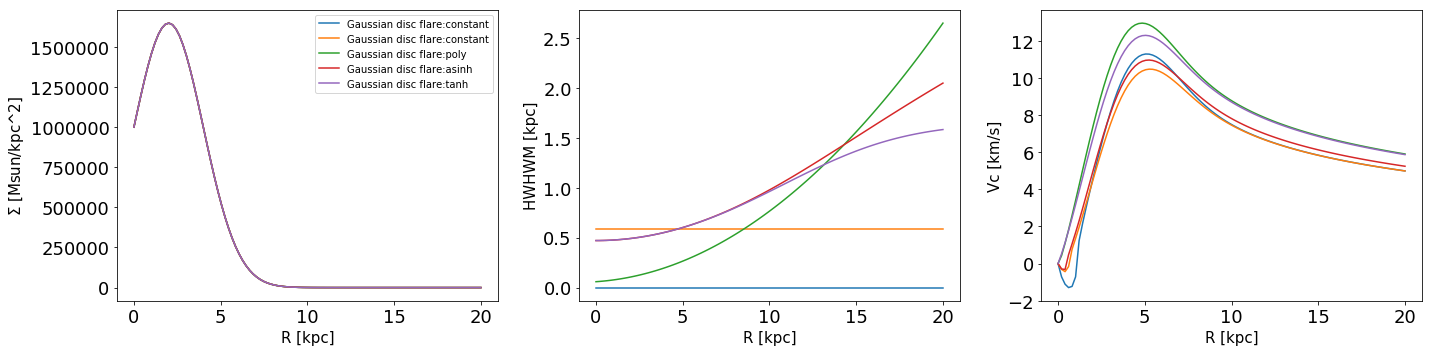

In [23]:
fig=plt.figure(figsize=(20,5))
ax_dens=fig.add_subplot(131)
ax_flare=fig.add_subplot(132)
ax_vcirc=fig.add_subplot(133)
R=np.linspace(0,20,100) #Cylidrincal radii where estimate surface density and flare

#Gau disc
#Sigma(R)=Sigma0*Exp(-0.5*((R-R0)/sigmad)^2)
sigma0=1e6 #Cental surface density in Msun/kpc2
R0= 2 #Radius where Sigma reach the peak
sigmad= 2 #Dispersion
Rcut= 50 #Cylindrical radius where dens(R>Rcut,z)=0
zcut= 20 #Cylindrical heigth where dens(R,|z|>zcut)=0
zlaw='gau' #Vertical density law: it could be gau, sech2, exp
#Vertical:
#razor-thin disc
gd=dc.Gaussian_disc.thin(sigma0=sigma0, sigmad=sigmad, R0=R0, Rcut=Rcut, zcut=zcut)
sdens=gd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=gd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=gd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=gd.name + ' flare:'+gd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])


#constant scale-heigth
zd=0.5 #Vertical scale heigth in kpc
gd=dc.Gaussian_disc.thick(sigma0=sigma0, sigmad=sigmad, R0=R0, Rcut=Rcut, zcut=zcut,zd=zd, zlaw=zlaw)
sdens=gd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=gd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=gd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=gd.name + ' flare:'+gd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])


#polynomial flare
pcoeff=[0.05,0.01,0.005] #Coefficent of the polynomial zd(R)=pcoeff[0]+pcoeff[1]*R+pcoeff[2]*R*R+....
gd=dc.Gaussian_disc.polyflare(sigma0=sigma0, sigmad=sigmad, R0=R0,  Rcut=Rcut, zcut=zcut, polycoeff=pcoeff, zlaw=zlaw)
sdens=gd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=gd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=gd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=gd.name + ' flare:'+gd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])


#Asinh flare
#zd(R)=h0+c*(Arcsinh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
gd=dc.Gaussian_disc.asinhflare(sigma0=sigma0, sigmad=sigmad, R0=R0, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=gd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=gd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=gd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=gd.name + ' flare:'+gd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])


#Tanh flare
#zd(R)=h0+c*(tanh(R*R/Rf*Rf))
h0=0.4 #Cental zd in kpc
c=1 #
Rf=15 #Flaring scale length in kpc
gd=dc.Gaussian_disc.tanhflare(sigma0=sigma0, sigmad=sigmad, R0=R0, Rcut=Rcut, zcut=zcut, h0=h0, c=c, Rf=Rf, zlaw=zlaw)
sdens=gd.Sdens(R) #sdens 2D array: col-0 R, col-1 Surface density at R [Msun/kpc^2]
flare=gd.flare(R, HWHM=True) #radial profile of the vertical scale length: col-0 R, col-1 zd or HWHM (if HWHM=True, default=False)
vcirc=gd.vcirc(R, nproc=2) #Vcric 2D array: col-0 R, col-1 Circular velocity on the plane [km/s]
ax_dens.plot(R, sdens[:,1], label=gd.name + ' flare:'+gd.flaw)
ax_flare.plot(R, flare[:,1])
ax_vcirc.plot(R, vcirc[:,1])


print(gd)


ax_dens.legend()
ax_dens.set_xlabel('R [kpc]',fontsize=15)
ax_vcirc.set_xlabel('R [kpc]',fontsize=15)
ax_flare.set_xlabel('R [kpc]',fontsize=15)
ax_dens.set_ylabel('$\Sigma$ [Msun/kpc^2]',fontsize=15)
ax_flare.set_ylabel('HWHWM [kpc]',fontsize=15)
ax_vcirc.set_ylabel('Vc [km/s]',fontsize=15)
plt.show()

Notes on disc components class.   

-Initialize a class with data:   
   It is possible to define a disc component fitting some data.
   If we want to fit the surface density we must define a disc model using the parameter rfit_array,while if we want to fit the flaring we must use the ffit_array. In both cases the array should be an array containing the R in the first column the data in the second and if present the data error on the third column. If the chosen flaring law is polynomial we must provide also the degree of the polynomial with the keyword fitdegree. Examples below


In [24]:
#We want a razor-thin disc with a exponential surface density law obtained fittig some observed data
#oberserved data
R=np.linspace(0.1,30,20)
sigma_o=1e6*np.exp(-R/4)
observed_data=np.zeros(shape=(20,2))
observed_data[:,0]=R
observed_data[:,1]=sigma_o
#define the model
ed=dc.Exponential_disc.thin(rfit_array=observed_data)
print(ed)

#We want an exponential disc with a polynomial flare
#flaring data
zd=lambda R,a1,a2,a3: a1+a2*R+a3*R*R
zd_o=zd(R,0.4,0.01,0.2)
observed_dataf=np.zeros(shape=(20,2))
observed_dataf[:,0]=R
observed_dataf[:,1]=zd_o
ed=dc.Exponential_disc.polyflare(rfit_array=observed_data,ffit_array=observed_dataf,fitdegree=3,zlaw='gau')
print(ed)

Model: Exponential disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: dirac
Radial density law: epoly 
Rd: 4.000 kpc 
Flaring law: constant 
Fparam: 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 30.000 kpc 
Rlimit: None 

Model: Exponential disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: gau
Radial density law: epoly 
Rd: 4.000 kpc 
Flaring law: poly 
Fparam: 4.0e-01 1.0e-02 2.0e-01 3.5e-18 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 30.000 kpc 
Rlimit: None 



POTENTIAL ESTIMATE

In [25]:
#Estimate the potential of a single component

#Define model
d0=1e6 #Cental density in Msun/kpc3
rc=5 #Core radius in Kpc
mcut=100 #radius where d(m>mcut)=0
e=0 #ellipticity
iso_halo=dc.isothermal_halo(d0=d0, rc=rc, mcut=mcut, e=e)

#Estimate potential
R=[0.1,2,10] #List with the cylindrical radial coordinates in Kpc
Z=[0,0.1,1] #List with the cylindrical vertical coordinates in Kpc
grid=True #If True create a grid from R and Z, otherwise estimate the potentail in the points (R[0],z[0]) (R[1],Z[1])..ecc 
nproc=2 #Number of proccesors to use for parallel computation
toll=1e-4 #Relative and absolute Tollerance for the potential integration 
potential_grid=iso_halo.potential(R=R,Z=Z,grid=grid,nproc=2)
print(potential_grid)
#First Column -R
#Second Column -Z
#Third Column Potenzial in Kpc^2/Myr^2

[[  1.00000000e-01   0.00000000e+00  -4.23552484e-03]
 [  1.00000000e-01   1.00000000e-01  -4.23543065e-03]
 [  1.00000000e-01   1.00000000e+00  -4.22621602e-03]
 [  2.00000000e+00   0.00000000e+00  -4.19961401e-03]
 [  2.00000000e+00   1.00000000e-01  -4.19952792e-03]
 [  2.00000000e+00   1.00000000e+00  -4.19109439e-03]
 [  1.00000000e+01   0.00000000e+00  -3.72924475e-03]
 [  1.00000000e+01   1.00000000e-01  -3.72921321e-03]
 [  1.00000000e+01   1.00000000e+00  -3.72609958e-03]]


Model: Triaxial Double Power law
Density: d = d0 / ((m/rc)**(alpha) * (1+m/rc)**(beta-alpha)) 
    with m**2 = x**2/a**2 + y**2/b**2 + z**2/c**2 
d0: 8.00e+08 Msun/kpc3 
rc: 1.00
alpha: -1.00
beta: 4.00
a: 1.00
b: 1.00
c: 0.50
mcut: 100.000 

Model: AlfaBeta halo
d0: 8.00e+08 Msun/kpc3 
rs: 1.00
alfa: -1.0
beta: 4.0
e: 0.866 
mcut: 100.000 



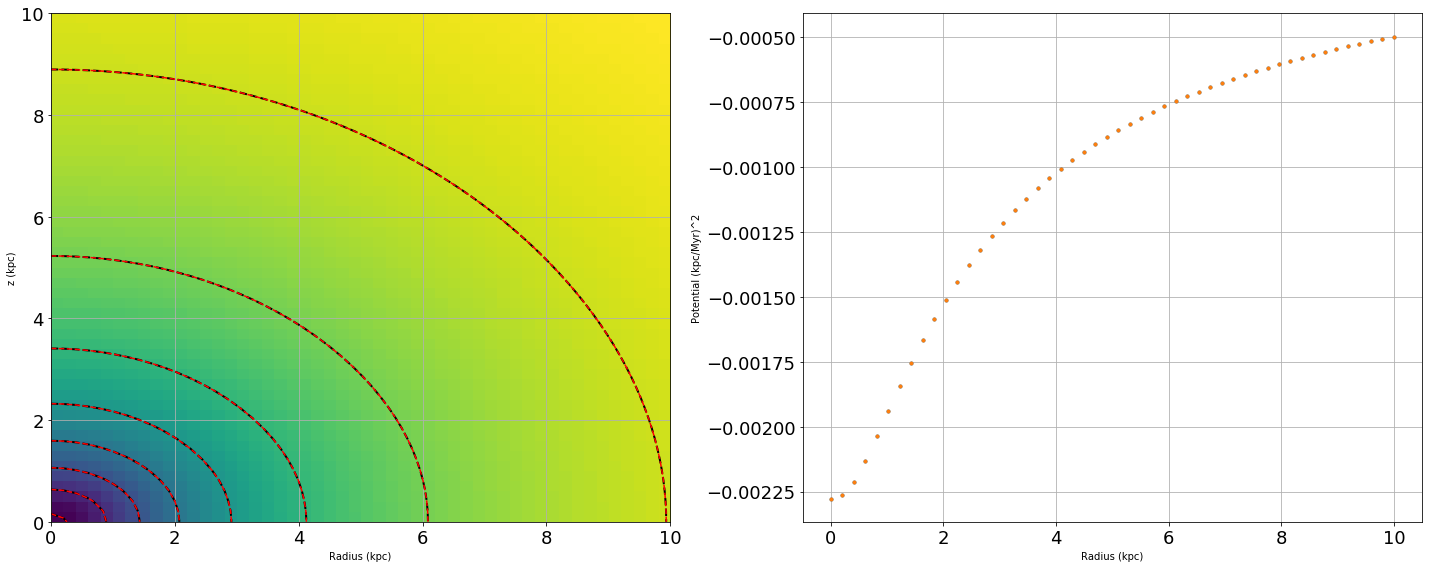

In [26]:
# Estimate potential of a triaxial halo

#Define model
d0=0.8E09 #Cental density in Msun/kpc3
rc=1      #Core radius in Kpc
mcut=100 #radius where d(m>mcut)=0
alpha = -1
beta = 4
a,b,c = 1,1,0.5
e= np.sqrt(1-c*c) #ellipticity
co = 0.00000001

#Defining a grid 
x,y,z = np.linspace(co,10,50), np.linspace(co,10,50), np.linspace(co,10,50)
# Triaxial double power-law potential 
halo1=dc.triaxial_doublepower_halo(d0=d0,rc=rc,alpha=alpha,beta=beta,a=a,b=b,c=c,mcut=mcut)
print (halo1)
pot1=halo1.potential(x,y,z,grid=True)

# Comparing it with oblate ellipsoid
R = np.linspace(co,10,50)
halo2=dc.alfabeta_halo(d0=d0,rs=rc,alpha=alpha,beta=beta,e=e,mcut=mcut)
print (halo2)
pot2=halo2.potential(R,z,grid=True,mcut=mcut)

pt1 = pot1[:,3].reshape(len(z),len(y),len(x))
pt2 = pot2[:,2].reshape(len(R),len(z)).T
plt.figure()

# Plot triaxial in the plane (x,0,z)
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.grid()
ax1.imshow(pt1[:,0,:],origin='lower',extent=[x[0],x[-1],z[0],z[-1]],aspect='auto')
ax1.contour(x,z,pt1[:,0,:], colors='k',linewidths=2)
ax1.set_xlabel("Radius (kpc)")
ax1.set_ylabel("z (kpc)")
# Compare with the oblate 
ax1.contour(R,z,pt2,colors='r')

# 1D profile comparison
ax2.grid()
ax2.plot(R,pt1[0,0,:],'.')
ax2.plot(R,pt2[0,:],'.')
ax2.set_xlabel("Radius (kpc)")
ax2.set_ylabel("Potential (kpc/Myr)^2")

plt.show()


In [27]:
#Estimate the potential of a ensemble of dynamic components
from discH.dynamics import galpotential

#Step1: Define the components
#Halo
d0=1e6
rs=5
mcut=100 
e=0 
halo=dc.NFW_halo(d0=d0, rs=rc, mcut=mcut, e=e)

#Bulge
d0=3e6
rs=1
mcut=10
e=0.6
bulge=dc.hernquist_halo(d0=d0, rs=rc, mcut=mcut, e=e)

#Stellar disc
sigma0=1e6
Rd=3
zd=0.4
zlaw='sech2'
Rcut=50
zcut=30
disc=dc.Exponential_disc.thick(sigma0=sigma0, Rd=Rd, zd=zd, zlaw=zlaw, Rcut=Rcut, zcut=zcut)


#Step2: Initialize galpotential class
ga=galpotential(dynamic_components=(halo,disc,bulge))
#If you want to check the properties of the component:
print('###########STEP2###########')
print('Components info')
ga.dynamic_components_info()
print('###########################')

#Step3
#Calculate potential at R-Z
R=np.linspace(0.1,30,10) #List with the cylindrical radial coordinates in Kpc
Z=np.linspace(0,5,10) #List with the cylindrical vertical coordinates in Kpc
grid=True #If True create a grid from R and Z, otherwise estimate the potentail in the points (R[0],z[0]) (R[1],Z[1])..ecc 
nproc=2 #Number of proccesor to use for parallel computation
toll=1e-4 #Relative and absolute Tollerance for the potential integration 
Rcut=None #If not None, set the Rcut of all the disc components to this value
zcut=None #If not None, set the zcut of all the disc components to this value
mcut=None #If not None, set the mcut of all the halo components to this value
external_potential=None #If not None, this should be an array matching the dimension of the final grid with an external potential in kpc^2/Myr^2 
print('###########STEP2###########')
print('Estimate Potential')
hp=ga.potential(R,Z,grid=grid, nproc=nproc, toll=toll, Rcut=Rcut, zcut=zcut, mcut=mcut, external_potential=external_potential)
#Return a grid with 0-R 1-Z 2-Total Potential in kpc^2/Myr^2
print('\nReturn a grid 0-R 1-Z 2-Total Potential in kpc^2/Myr^2, e.g.:')
print(hp[:5])
print('###########################')

#Step4 Use the results or save them in files:

#The potential information can be accessed with
pot_grid=ga.potential_grid
#Array with col-0: R in kpc, col-1: Z in kpc, col-2: Total potential in kpc^2/Myr^2
pot_grid_complete=ga.potential_grid_complete
#Array with col-0: R in kpc, col-1: Z in kpc, col-i+1: Potential of the single  (i+1)th component
#col-ncomponent+2: External potential col-ncomponent+3: Total potential 
#e.g:
pot_disc=pot_grid_complete[:,3]


#To save  in file
complete=True #If True save the pot_grid_complete array (see above), if False the pot_grid array
filename='potential.dat' #File where to store the data
ga.save(filename=filename, complete=complete)




###########STEP2###########
Components info
Components: 0
Model: NFW halo
d0: 1.00e+06 Msun/kpc3 
rs: 1.00
e: 0.000 
mcut: 100.000 

Components: 1
Model: Exponential disc 
Sigma0: 1.00e+06 Msun/kpc2 
Vertical density law: sech2
Radial density law: epoly 
Rd: 3.000 kpc 
Flaring law: constant 
Fparam: 4.0e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
Rcut: 50.000 kpc 
zcut: 30.000 kpc 
Rlimit: None 

Components: 2
Model: Hernquist halo
d0: 3.00e+06 Msun/kpc3 
rs: 1.00
e: 0.600 
mcut: 10.000 

###########################
###########STEP2###########
Estimate Potential
External potential: No
Calculating Potential of the 1th component (NFW halo)...Done (0.00 s)
Calculating Potential of the 2th component (Exponential disc)...Done (0.71 s)
Calculating Potential of the 3th component (Hernquist halo)...Done (0.00 s)

Return a grid 0-R 1-Z 2-Total Potential in kpc^2/Myr^2, e.g.:
[[  1.00000000e-01   0.00000000e+00  -1.97041695e-04]
 [  1.00000000e-01   5.55555556e-01

External potential: No
Calculating Potential of the 1th component (Power law with cut halo)...Done (1.88 s)
Calculating Potential of the 2th component (AlfaBeta halo)...Done (0.40 s)
Calculating Potential of the 3th component (Exponential disc)...Done (29.59 s)
Calculating Potential of the 4th component (Exponential disc)...Done (27.40 s)


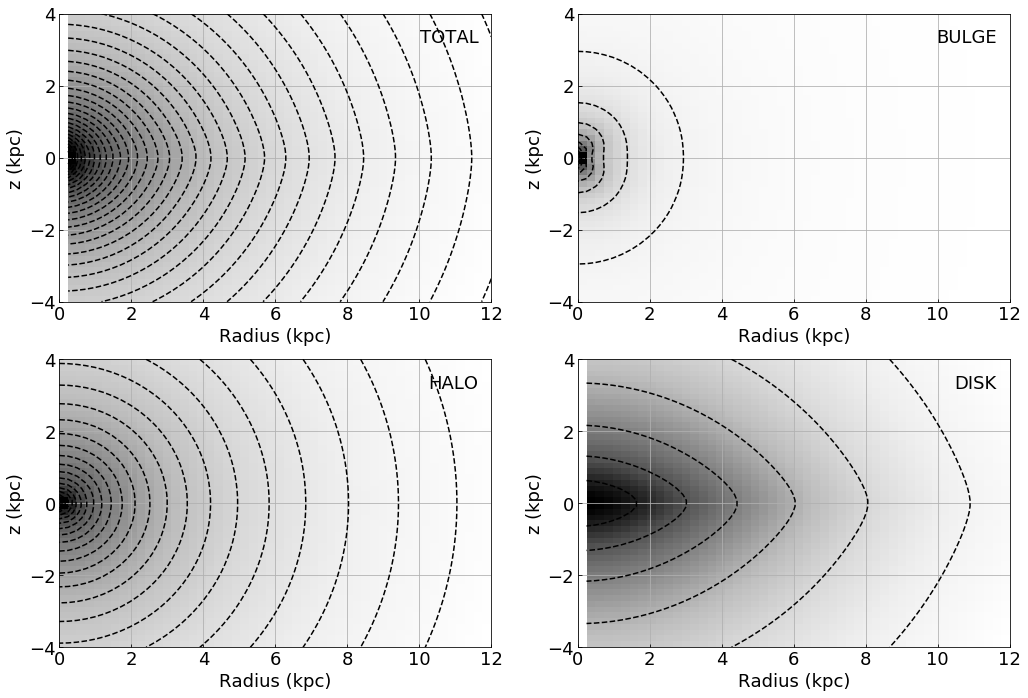

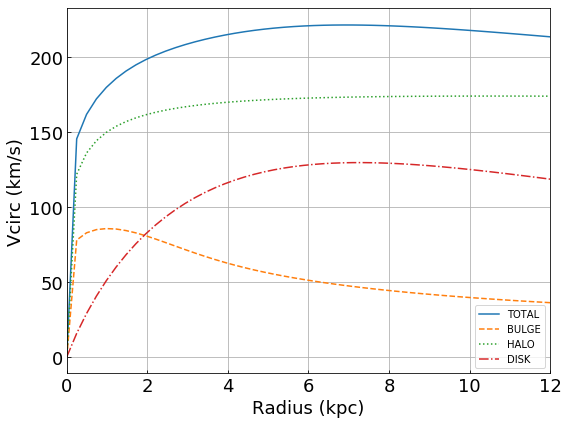

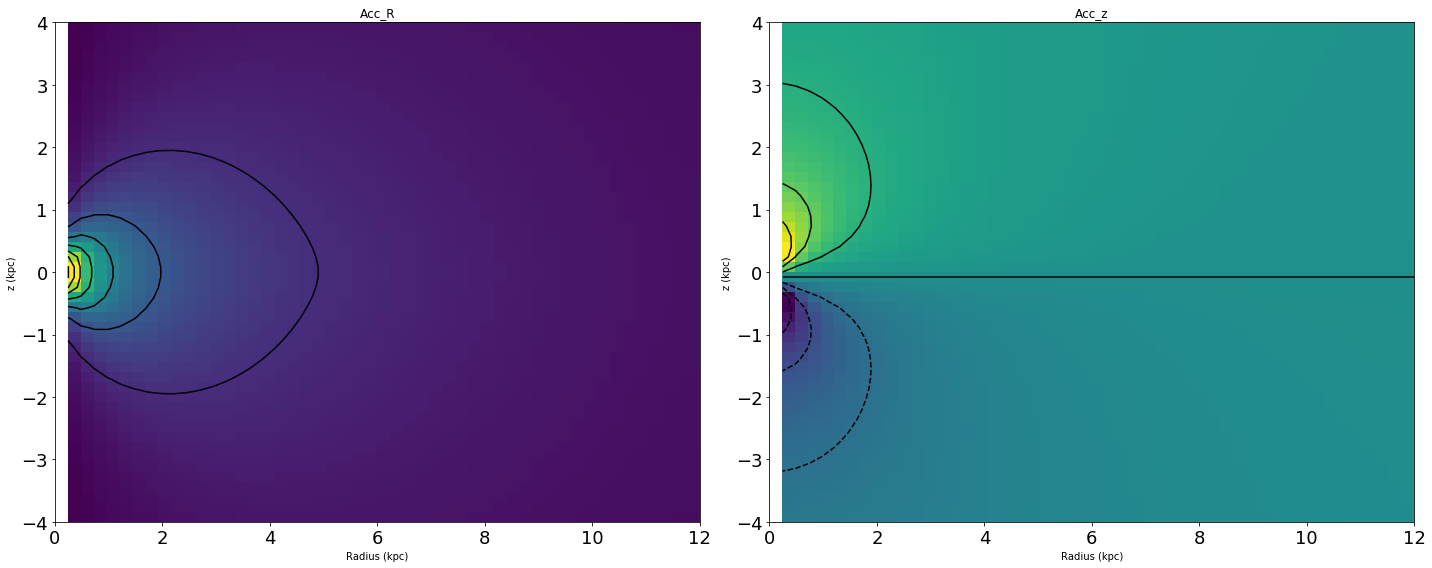

In [30]:
# MW Potential
from discH.dynamics import MWpotential
from discH import utils

# Grid and cuts
mcut, zcut = 100., 50
R,z = np.linspace(0,12,50), np.linspace(-4,4,50)
nproc = 4

# Initializing a MW model: available models are:
# 1) Binney&Tremaine08 (Tab. 2.3) model1 ("BT08_Model1") and model2 ("BT08_Model2")
# 2) Sormani et al. 2017 (see also Ridley+17) ("S+17")
MW = MWpotential('BT08_Model2')
# Calculate potentials
MW.calculate_potential(coordgrid=(R,z),grid=True,Rcut=mcut,zcut=zcut,mcut=mcut,nproc=nproc)
# Write potentials on a FITS file (ext0 is the total, ext1-4 the various components)
# MW.writeFITS("MWpot.fits")
# Write total potential on a HDF5 file 
# utils.writeHDF5(MW.potgrid,MW.totalpot,npots=1,"MWpot.h5",)
# Plot potentials (give a fname to plot in a file). Compare with fig 2.21 BT08
fpot = MW.plot_potentials(fname=None)
# Calculate Vcirc
MW.calculate_vcirc(R)
# Plot vcirc (give a fname to plot in a file)
fvc = MW.plot_vcirc(fname=None)

# Calculate accelerations along R and z
aR, az = utils.calculate_acceleration(MW.potgrid,MW.totalpot)
# Plot them
fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.imshow(aR,origin='lower',aspect='auto',extent=[R[0],R[-1],z[0],z[-1]])
ax1.contour(R,z,aR,colors='k')
ax1.set_xlabel("Radius (kpc)")
ax1.set_ylabel("z (kpc)")
ax1.set_title("Acc_R")

ax2.imshow(az,origin='lower',aspect='auto',extent=[R[0],R[-1],z[0],z[-1]])
ax2.set_xlabel("Radius (kpc)")
ax2.set_ylabel("z (kpc)")
ax2.contour(R,z,az,colors='k')
ax2.set_title("Acc_z")

plt.show()

ESTIMATE SCALE HEIGHT
The scale heigth of a disc can be obtained using the class discHeight

In [32]:
from discH.dynamics import discHeight

##STEP: 1
#Define all the fixed components
#Halo
d0=1e6
rs=5
mcut=100 
e=0 
halo=dc.NFW_halo(d0=d0, rs=rc, mcut=mcut, e=e)

#Bulge
d0=3e6
rs=1
mcut=10
e=0.6
bulge=dc.hernquist_halo(d0=d0, rs=rc, mcut=mcut, e=e)

#Stellar disc
sigma0=5e6
Rd=3
zd=0.4
zlaw='sech2'
Rcut=50
zcut=30
disc=dc.Exponential_disc.thick(sigma0=sigma0, Rd=Rd, zd=zd, zlaw=zlaw, Rcut=Rcut, zcut=zcut)

galaxy=(bulge,disc,halo)

#STEP 2: Define the disc model

#Gas disc
g_sigma0=1e6
g_Rd=5
g_Rd2=5
g_alpha=1
Rcut=60
zcut=30
gas_disc=dc.Frat_disc.thin(sigma0=g_sigma0, Rd=g_Rd, Rd2=g_Rd2, alpha=g_alpha, Rcut=Rcut, zcut=zcut)
#NB, Here the definition of the flaring model is not important, because then it will be re-defined in the
#scale heigth calculation, so the use of thin is useful to avoid to insert useless information about the flaring properties.

#STEP 3: Initialize the discHeight class
h=discHeight(dynamic_components=galaxy, disc_component=gas_disc)


#Step 4: Estimat height
zlaw='gau' #Vertical zlaw, it could be 'gau', 'sech2' or 'exp' default=gau
flaw='poly' #Flaring law, it could be 'poly', 'asinh', 'tanh', default=poly
polyflare_degree=5 #If flaw='poly' this is the degree of the polynomial, otherwise it is not used, default=5

#Vel dispersion
#Velocity dispersion, we assume that the disc component as an isotropic velocity dispersion and that is is
#isothermal in the vertical direction, so vdisp=vdisp(R). 
#There are different option:
#1-Constant velocity dispersion
vdisp=10 
#2-Function of R, e.g.
vdisp=lambda R: 10 + 5/(1+R)
#3-Array of values with col-0 R col-1 v(R)
vdisp_array=np.array([[0,1,4,5,10],[15,12,10,9,8]])
vdisp=vdisp_array
#In this internally, vidsp=vdisp_func(R), where vdisp_func is the interpolating function of the array with vdisp=vdisp_array[0,1] for R<vdisp_array[0,0] and  vdisp=vdisp_array[-1,1] for R>vdisp_array[-1,0]

#R array
#These three quantities define the cylindrical R coordinates that will be used to estimate zd(R)
Rpoints=30 #Number of R points, or list of Rpoints, default=30
Rinterval='linear' #interval type, default=linear
Rrange=(0.01,30)    #Min-max R, default=(0.01,30)
#If Rpoints is a number, the R grid is defined as np.linspace(Rrange[0],Rrange[30],Rpoints) if Rinterval=linear or np.logspace(np.log10(Rrange[0]),np.log10(Rrange[30]),Rpoints)
#If Rpoints is a list a tuple or np.ndarray use the points inside the list

#Z array
#These three quantities define the cylindrical z coordinates that will be used to estimate the zd at each radius
Zpoints=30    #Number of z points, or list of zpoints, default=30
Zinterval='log'   #nterval type, default=log
Zrange=(0,10) #Min-max z, default=(0,10)
#If Zpoints is a number, the z grid is defined as np.linspace(Zrange[0],Zrange[30],Zpoints) if Zinterval=linear or np.logspace(np.log10(Zrange[0]),np.log10(Zrange[30]),Zpoints)
#If Zpoints is a list a tuple or np.ndarray use the points inside the list
#NB, Zrange[0] must be always 0 to have a good estimate of the vertical profile of the disc

#The estimate of zd is iterative. The iteration stop when one of the following is True
#Number of iteration < Niter
#Maximum Absolute residual between two sequential estiamates of zd lower than flaretollabs
#Maximum Relative residual between two sequential estiamates of zd lower than flaretollrel
Niter=10 #Max number of iteration, default=10
flaretollabs=1e-4   # default=1e-4
flaretollrel=1e-4   # default=1e-4

nproc=2  #Number of proccesors to use for parallel computation, default=2

Rcut=None #If not None, set the Rcut of all the disc components to this value, default=None
zcut=None #If not None, set the zcut of all the disc components to this value, default=None
mcut=None #If not None, set the mcut of all the halo components to this value, default=None
Rlimit='max' #If not None, set a limit Radius for the flaring, i.e. the radius where zd(R)=zd(Rlimit) for R>Rlimit,
#this could be useful when the flare is fitted with an high degree polynomial that can have a very strange behaviour outside the used R range.
#if 'max', Rlimit=max(R), where R is defined using Rpoints (see above)

inttoll=1e-4 #Relative and absolute Tollerance for the potential integration, default=1e-4
external_potential=None #External potential, default=None
outdir='gasHeight_res' #Folder where to save the outputs, default='gasHeight'
diagnostic=True #If True, save figures and tables to see all results of the iterations in details, default=True

final_gas_model, tab_zd,flare_func,fit_func=h.height(flaw=flaw, zlaw=zlaw, polyflare_degree=polyflare_degree, vdisp=10, Rpoints=Rpoints, Rinterval=Rinterval, Rrange=Rrange, Zpoints=Zpoints, Zrange=Zrange, Niter=Niter, nproc=nproc, Rcut=Rcut, zcut=zcut, mcut=mcut, flaretollabs=flaretollabs, flaretollrel=flaretollrel, inttoll=inttoll, external_potential=external_potential, outdir=outdir, diagnostic=diagnostic, Rlimit=Rlimit)


//////////////////////////////////////////////////////////////////////////////
Calculating fixed potential
External potential: No
Calculating Potential of the 1th component (Hernquist halo)...Done (0.03 s)
Calculating Potential of the 2th component (Exponential disc)...Done (7.95 s)
Calculating Potential of the 3th component (NFW halo)...Done (0.01 s)
Fixed potential Done
//////////////////////////////////////////////////////////////////////////////

//////////////////////////////////////////////////////////////////////////////
Iter-0: Massless disc
**************************************************
                START FITZPROFILE                 
**************************************************
Number of Radii: 30 
Number of Vertical points: 30
Number of the used distributions: 1   ['gau']
1
nplot 2
---Fitting---
Working on radius: 0.01
Working on radius: 1.04
Plotting
Working on radius: 2.08
Working on radius: 3.11
Plotting
Working on radius: 4.15
Working on radius: 5.18
Plotting

UnboundLocalError: local variable 'comp' referenced before assignment

#Results of the functions:   

0-final_gas_model: The final disc model, with the Radial surface density law given in inputr and the vertical profiles obtained in the iterative process  

1-tab_zd: A tabel with 0-R [kpc] 1-Zd [kpc]   

2-flare_func: The interpolating function of tab_zd, zd(R)=flare_func(R)   

3-fit_func: The best-fit function (as defined with flaw) to the last zd estimate.   

In the output folder you can find:   

-finalflare_zd.pdf: a figure with the  zd estimate at each iterative step (gray lines), the last estimate is shown by blue points and the red curve is the last best-fit function   

-finalflare_hwhm.pdf: The final zd estimate, but the value in y is the HWHM

-tabflare.dat: 0-Col R[kpc], 1-Col zd[kpc], 2-Col HWHM[kpc]   

-tab_fixedpotential.dat: Tab with the potentials of the fixed dynamic components

-tab_totpotential.dat: Tab with the potential of the final disc component

-My suggestion is to use:   

    Rlimit='max'   
    flaw='poly'   
    polyflare_degree_degree=5